# Exploratory Analysis on which cities has the most volatile markets
### Andrew's File

In [1]:
# Dependencies
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns

# Custom Scripts
import project1scripts as custom

warnings.filterwarnings('ignore')

In [2]:
# Loading cleaned dataframe
df_main = pd.read_csv('clean_median_sale_price_v2_df.csv')
df_main = df_main.iloc[:, 1:]
df_main.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,34491100.0,33935000.0,33535000.0,33351700,34200000,35600000,37100000,38066700,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,"Los Angeles, CA",CA,39400000.0,39733300.0,40733300.0,43066700,45066700,46500000,46833300,47166700,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,"Chicago, IL",IL,16283300.0,15800000.0,16021800.0,17021800,18338500,19783300,20750000,21233300,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,"Dallas, TX",TX,15166700.0,15216700.0,15533300.0,16450000,17280000,17846700,18163300,18112500,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,"Houston, TX",TX,14983300.0,14857200.0,15040500.0,16015500,16741700,17490000,17765000,17865000,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [3]:
# df_main.iloc[:,:2].to_csv('cities_index.csv')

In [4]:
df_pct = df_main.iloc[:,2:].pct_change(axis=1)
df_pct

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,NaN,-0.016123,-0.011787,-0.005466,0.025435,0.040936,0.042135,0.026057,-0.006788,-0.023804,...,-0.029442,-0.027607,-0.018927,-0.005788,-0.011319,0.001635,0.012412,0.037095,0.041991,0.038210
1,NaN,0.008459,0.025168,0.057285,0.046440,0.031804,0.007168,0.007119,-0.006360,-0.007114,...,-0.013127,-0.013694,-0.015866,-0.010480,-0.002036,0.013060,0.014102,0.017878,0.022638,0.017176
2,NaN,-0.029681,0.014038,0.062415,0.077354,0.078785,0.048864,0.023292,-0.033749,-0.048741,...,-0.033898,-0.023393,-0.017964,-0.012194,-0.003704,0.024658,0.042328,0.045249,0.042847,0.021286
3,NaN,0.003297,0.020806,0.059015,0.050456,0.032795,0.017740,-0.002797,-0.016563,-0.024326,...,-0.020893,-0.020487,-0.023966,-0.026786,-0.002752,0.012880,0.027248,0.020337,0.026862,0.013501
4,NaN,-0.008416,0.012337,0.064825,0.045344,0.044697,0.015723,0.005629,-0.021366,-0.021924,...,-0.026290,-0.015576,-0.016877,-0.015023,-0.005448,0.006572,0.022851,0.026598,0.021762,0.015213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,NaN,-0.068067,0.253566,-0.009460,0.059104,-0.054538,0.113278,-0.046056,0.021753,-0.054943,...,0.031965,0.030594,-0.037144,-0.069367,0.000209,-0.028982,-0.025582,0.056663,0.084933,0.087785
471,NaN,-0.072464,-0.081164,-0.127539,-0.012994,-0.037300,-0.014246,-0.023119,-0.082843,0.005950,...,-0.042451,0.028499,-0.060961,0.045903,-0.021004,0.030419,-0.021751,0.002222,0.001586,-0.003482
472,NaN,0.019694,0.012876,-0.042369,0.058075,0.050183,0.137382,0.030197,-0.016996,-0.064823,...,-0.049398,0.008185,0.018263,0.001992,-0.051313,-0.127882,0.029807,0.109711,0.109381,0.059916
473,NaN,0.081559,0.022241,-0.029010,-0.041165,-0.068994,0.018885,-0.043899,0.048100,-0.011005,...,-0.041022,0.016523,0.022576,0.040344,-0.000340,-0.075571,0.033356,-0.044089,0.027152,-0.021184


In [5]:
df_cities = pd.read_csv('cities_index.csv')
df_cities = df_cities.iloc[:,1:]
df_cities.head()

,RegionName,StateName
0,"New York, NY",NY
1,"Los Angeles, CA",CA
2,"Chicago, IL",IL
3,"Dallas, TX",TX
4,"Houston, TX",TX


In [6]:
# Concat cities and drop empty column
df_pct = pd.concat([df_cities, df_pct], axis=1).drop('1/31/2013', axis=1)

In [7]:
df_pct.head()

,RegionName,StateName,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,-0.016123,-0.011787,-0.005466,0.025435,0.040936,0.042135,0.026057,-0.006788,...,-0.029442,-0.027607,-0.018927,-0.005788,-0.011319,0.001635,0.012412,0.037095,0.041991,0.038210
1,"Los Angeles, CA",CA,0.008459,0.025168,0.057285,0.046440,0.031804,0.007168,0.007119,-0.006360,...,-0.013127,-0.013694,-0.015866,-0.010480,-0.002036,0.013060,0.014102,0.017878,0.022638,0.017176
2,"Chicago, IL",IL,-0.029681,0.014038,0.062415,0.077354,0.078785,0.048864,0.023292,-0.033749,...,-0.033898,-0.023393,-0.017964,-0.012194,-0.003704,0.024658,0.042328,0.045249,0.042847,0.021286
3,"Dallas, TX",TX,0.003297,0.020806,0.059015,0.050456,0.032795,0.017740,-0.002797,-0.016563,...,-0.020893,-0.020487,-0.023966,-0.026786,-0.002752,0.012880,0.027248,0.020337,0.026862,0.013501
4,"Houston, TX",TX,-0.008416,0.012337,0.064825,0.045344,0.044697,0.015723,0.005629,-0.021366,...,-0.026290,-0.015576,-0.016877,-0.015023,-0.005448,0.006572,0.022851,0.026598,0.021762,0.015213


<Axes: >

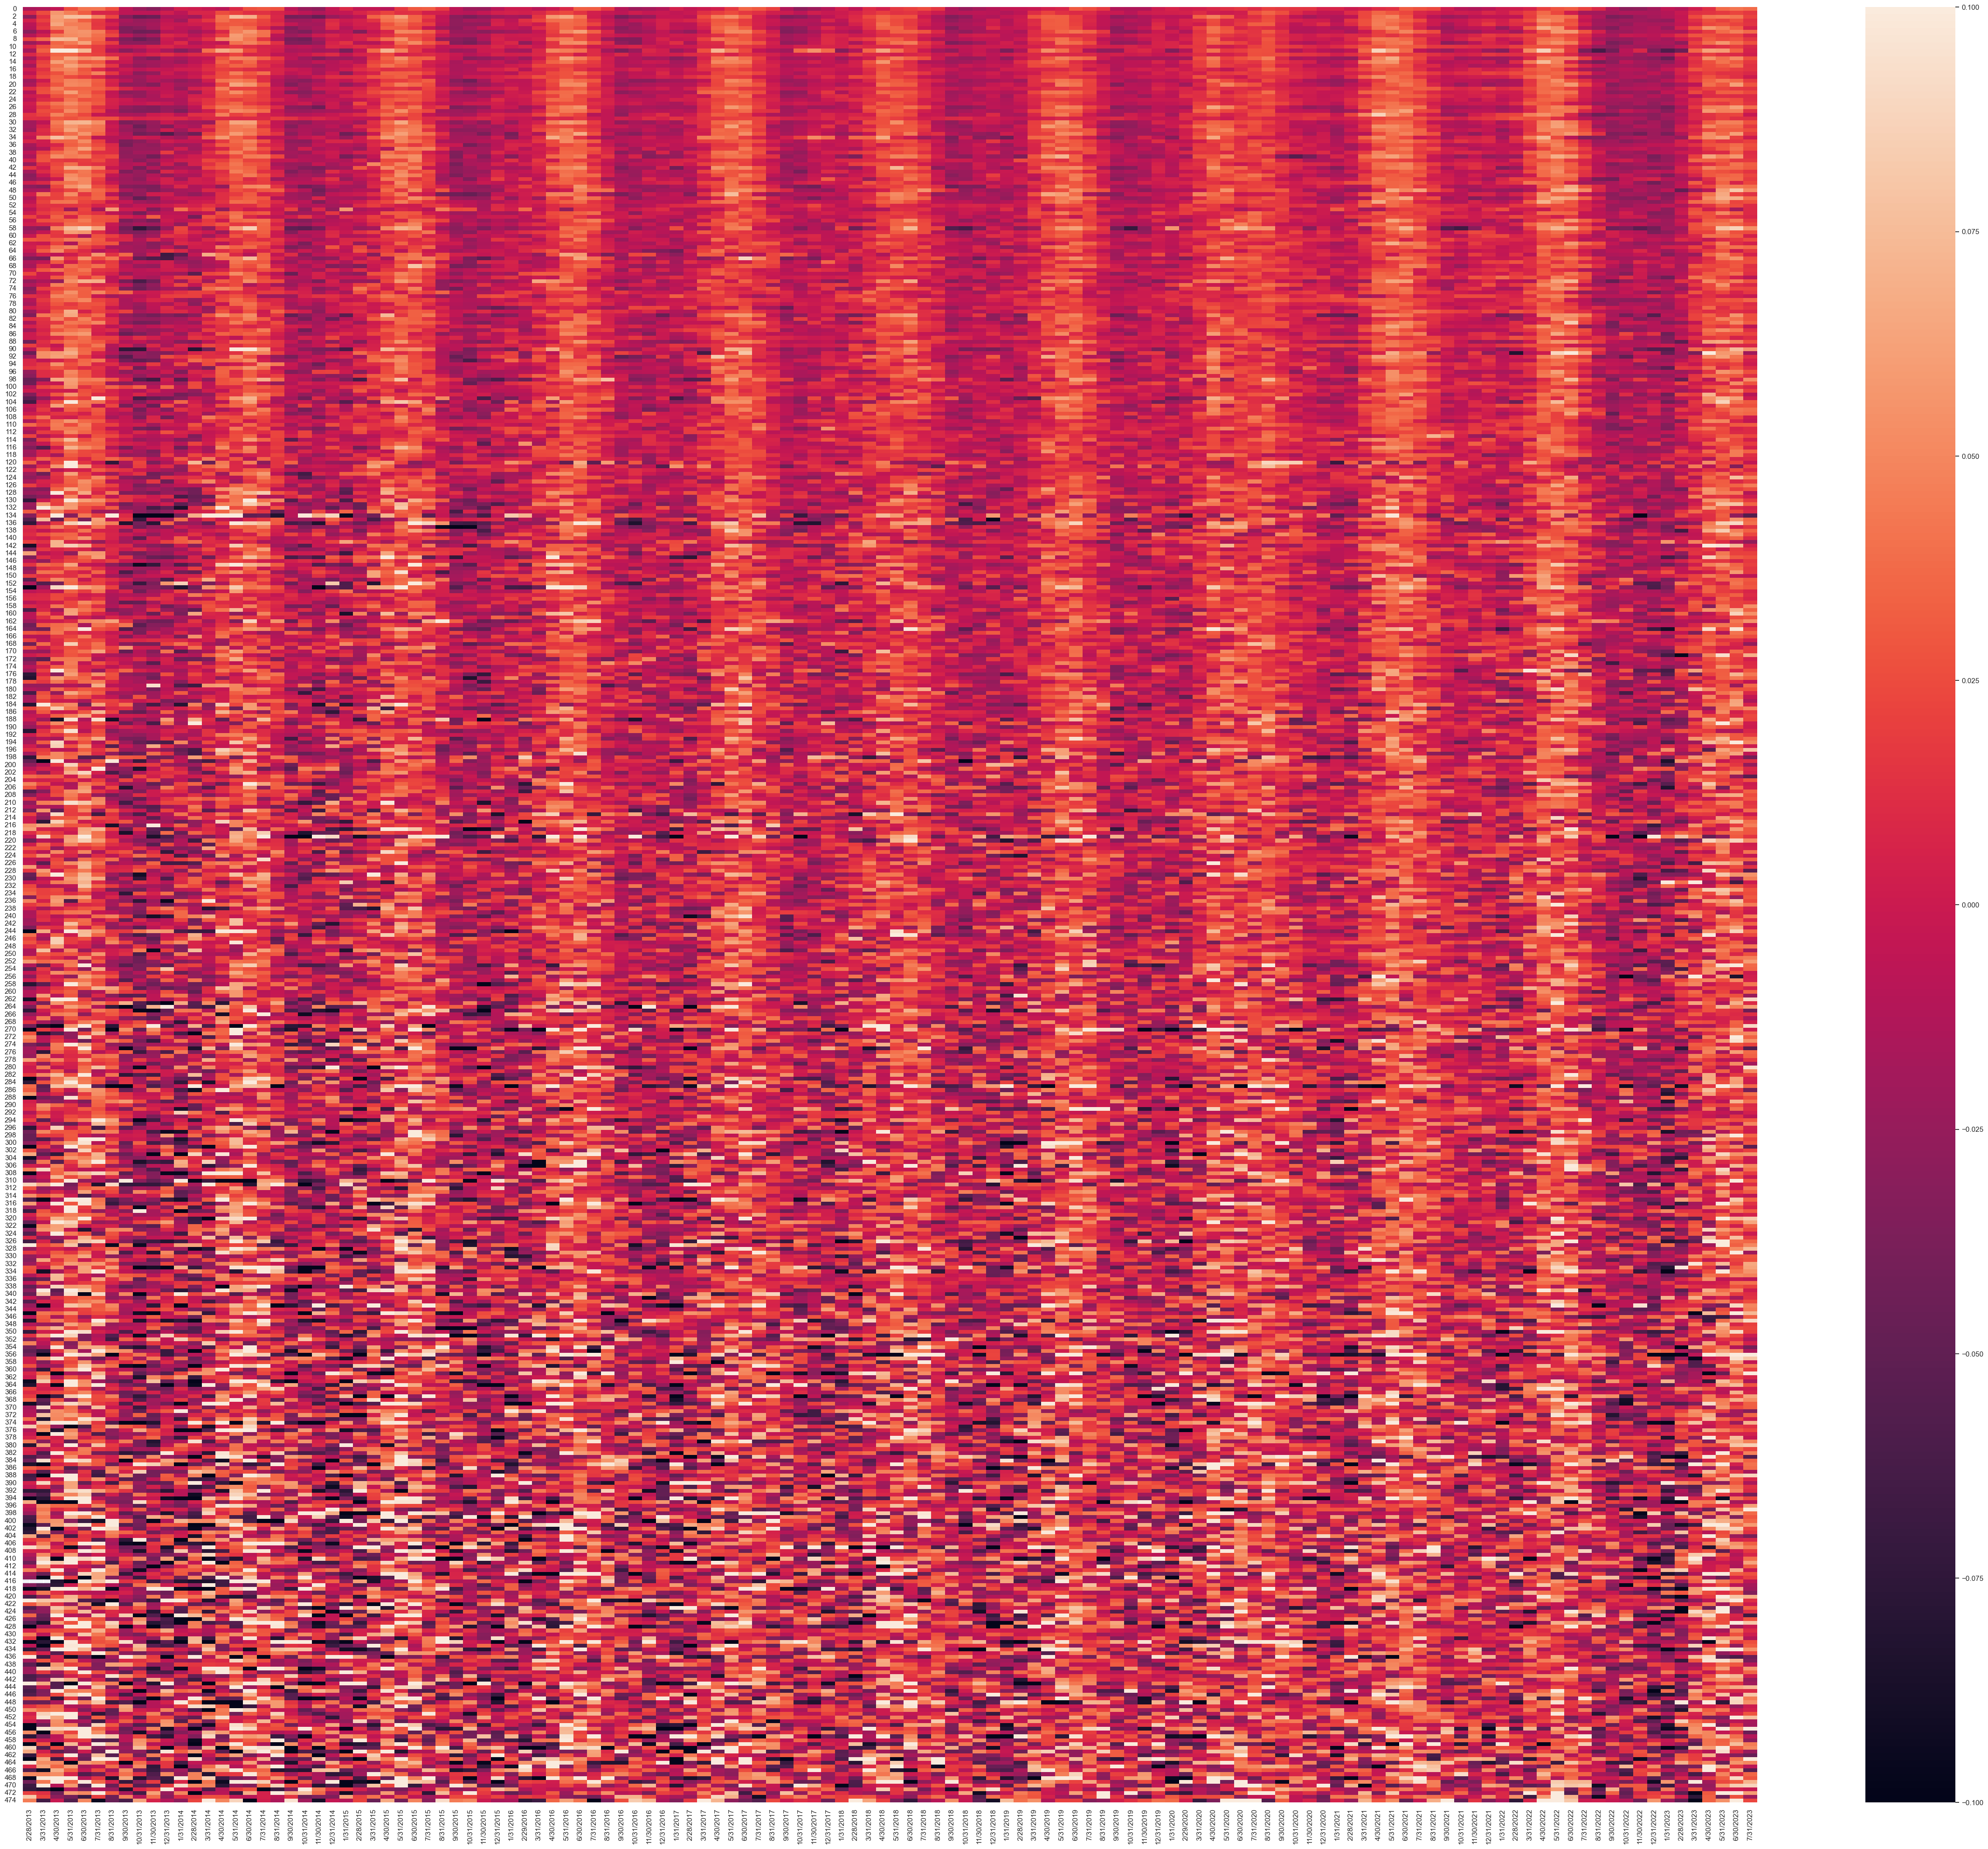

In [8]:
# Draw a heatmap with the numeric values in each cell
sns.set_theme()
f, ax = plt.subplots(figsize=(60, 50))
sns.heatmap(df_pct.iloc[:,2:], fmt="d", linewidths=0, ax=ax)

In [9]:
# Split data into 5 regions:
df_ne_pct, df_se_pct, df_mw_pct, df_w_pct, df_sw_pct = custom.split_regions(df_pct)
df_ne_pct.head()
df_all_regions_pct = [df_ne_pct, df_se_pct, df_mw_pct, df_w_pct, df_sw_pct]

# Capture list of cities:
ne_names = df_ne_pct.iloc[:, 0]
se_names = df_se_pct.iloc[:, 0]
mw_names = df_mw_pct.iloc[:, 0]
w_names = df_w_pct.iloc[:, 0]
sw_names = df_sw_pct.iloc[:, 0]
df_all_region_names = [ne_names, se_names, mw_names, w_names, sw_names]

In [10]:
# Transpose table so observations are on the rows
df_ne_pct = df_ne_pct.transpose()
df_se_pct = df_se_pct.transpose()
df_mw_pct = df_mw_pct.transpose()
df_w_pct = df_w_pct.transpose()
df_sw_pct = df_sw_pct.transpose()

In [11]:
# Clean and change column indexes
df_ne_pct.columns = ne_names
df_se_pct.columns = se_names
df_mw_pct.columns = mw_names
df_w_pct.columns = w_names
df_sw_pct.columns = sw_names

# Drop State Abbreviations
df_ne_pct = df_ne_pct.iloc[2:, :]
df_se_pct = df_se_pct.iloc[2:, :]
df_mw_pct = df_mw_pct.iloc[2:, :]
df_w_pct = df_w_pct.iloc[2:, :]
df_sw_pct = df_sw_pct.iloc[2:, :]

In [12]:
df_ne_pct.head()

RegionName,"New York, NY","Philadelphia, PA","Boston, MA","Pittsburgh, PA","Providence, RI","Hartford, CT","Buffalo, NY","Rochester, NY","Worcester, MA","Bridgeport, CT",...,"Corning, NY","Sunbury, PA","New Castle, PA","Indiana, PA","Plattsburgh, NY","Olean, NY","Auburn, NY","Keene, NH","Somerset, PA","Laconia, NH"
2/28/2013,-0.016123,-0.030511,-0.023233,-0.002,-0.023047,-0.029588,-0.016172,-0.014514,-0.002225,-0.025901,...,-0.039799,-0.041162,-0.082333,0.017454,0.043286,-0.083876,-0.06618,-0.059762,0.066843,-0.06185
3/31/2013,-0.011787,-0.00853,-0.00973,0.018701,-0.012671,-0.034073,-0.012937,0.016988,0.025845,-0.031339,...,-0.019193,-0.110214,0.007006,-0.150631,-0.029726,-0.101093,-0.131203,0.009431,-0.107417,-0.028844
4/30/2013,-0.005466,0.019355,0.034936,0.033364,0.017703,0.022048,0.013881,0.021022,0.028671,0.048038,...,0.097087,-0.008439,-0.114269,-0.07024,0.00817,0.003977,0.158723,-0.005499,-0.095983,0.029911
5/31/2013,0.025435,0.053165,0.044304,0.041881,0.043476,0.055216,0.021904,0.030675,0.034206,0.075772,...,-0.026921,0.126526,0.149721,0.083286,-0.049092,0.014773,0.136476,0.109174,-0.098263,0.072093
6/30/2013,0.040936,0.056091,0.062627,0.034599,0.064,0.065416,0.047337,0.026452,0.0441,0.086958,...,0.066732,0.090492,0.05528,0.120293,0.029827,0.04721,0.008721,0.01893,0.11863,0.038231


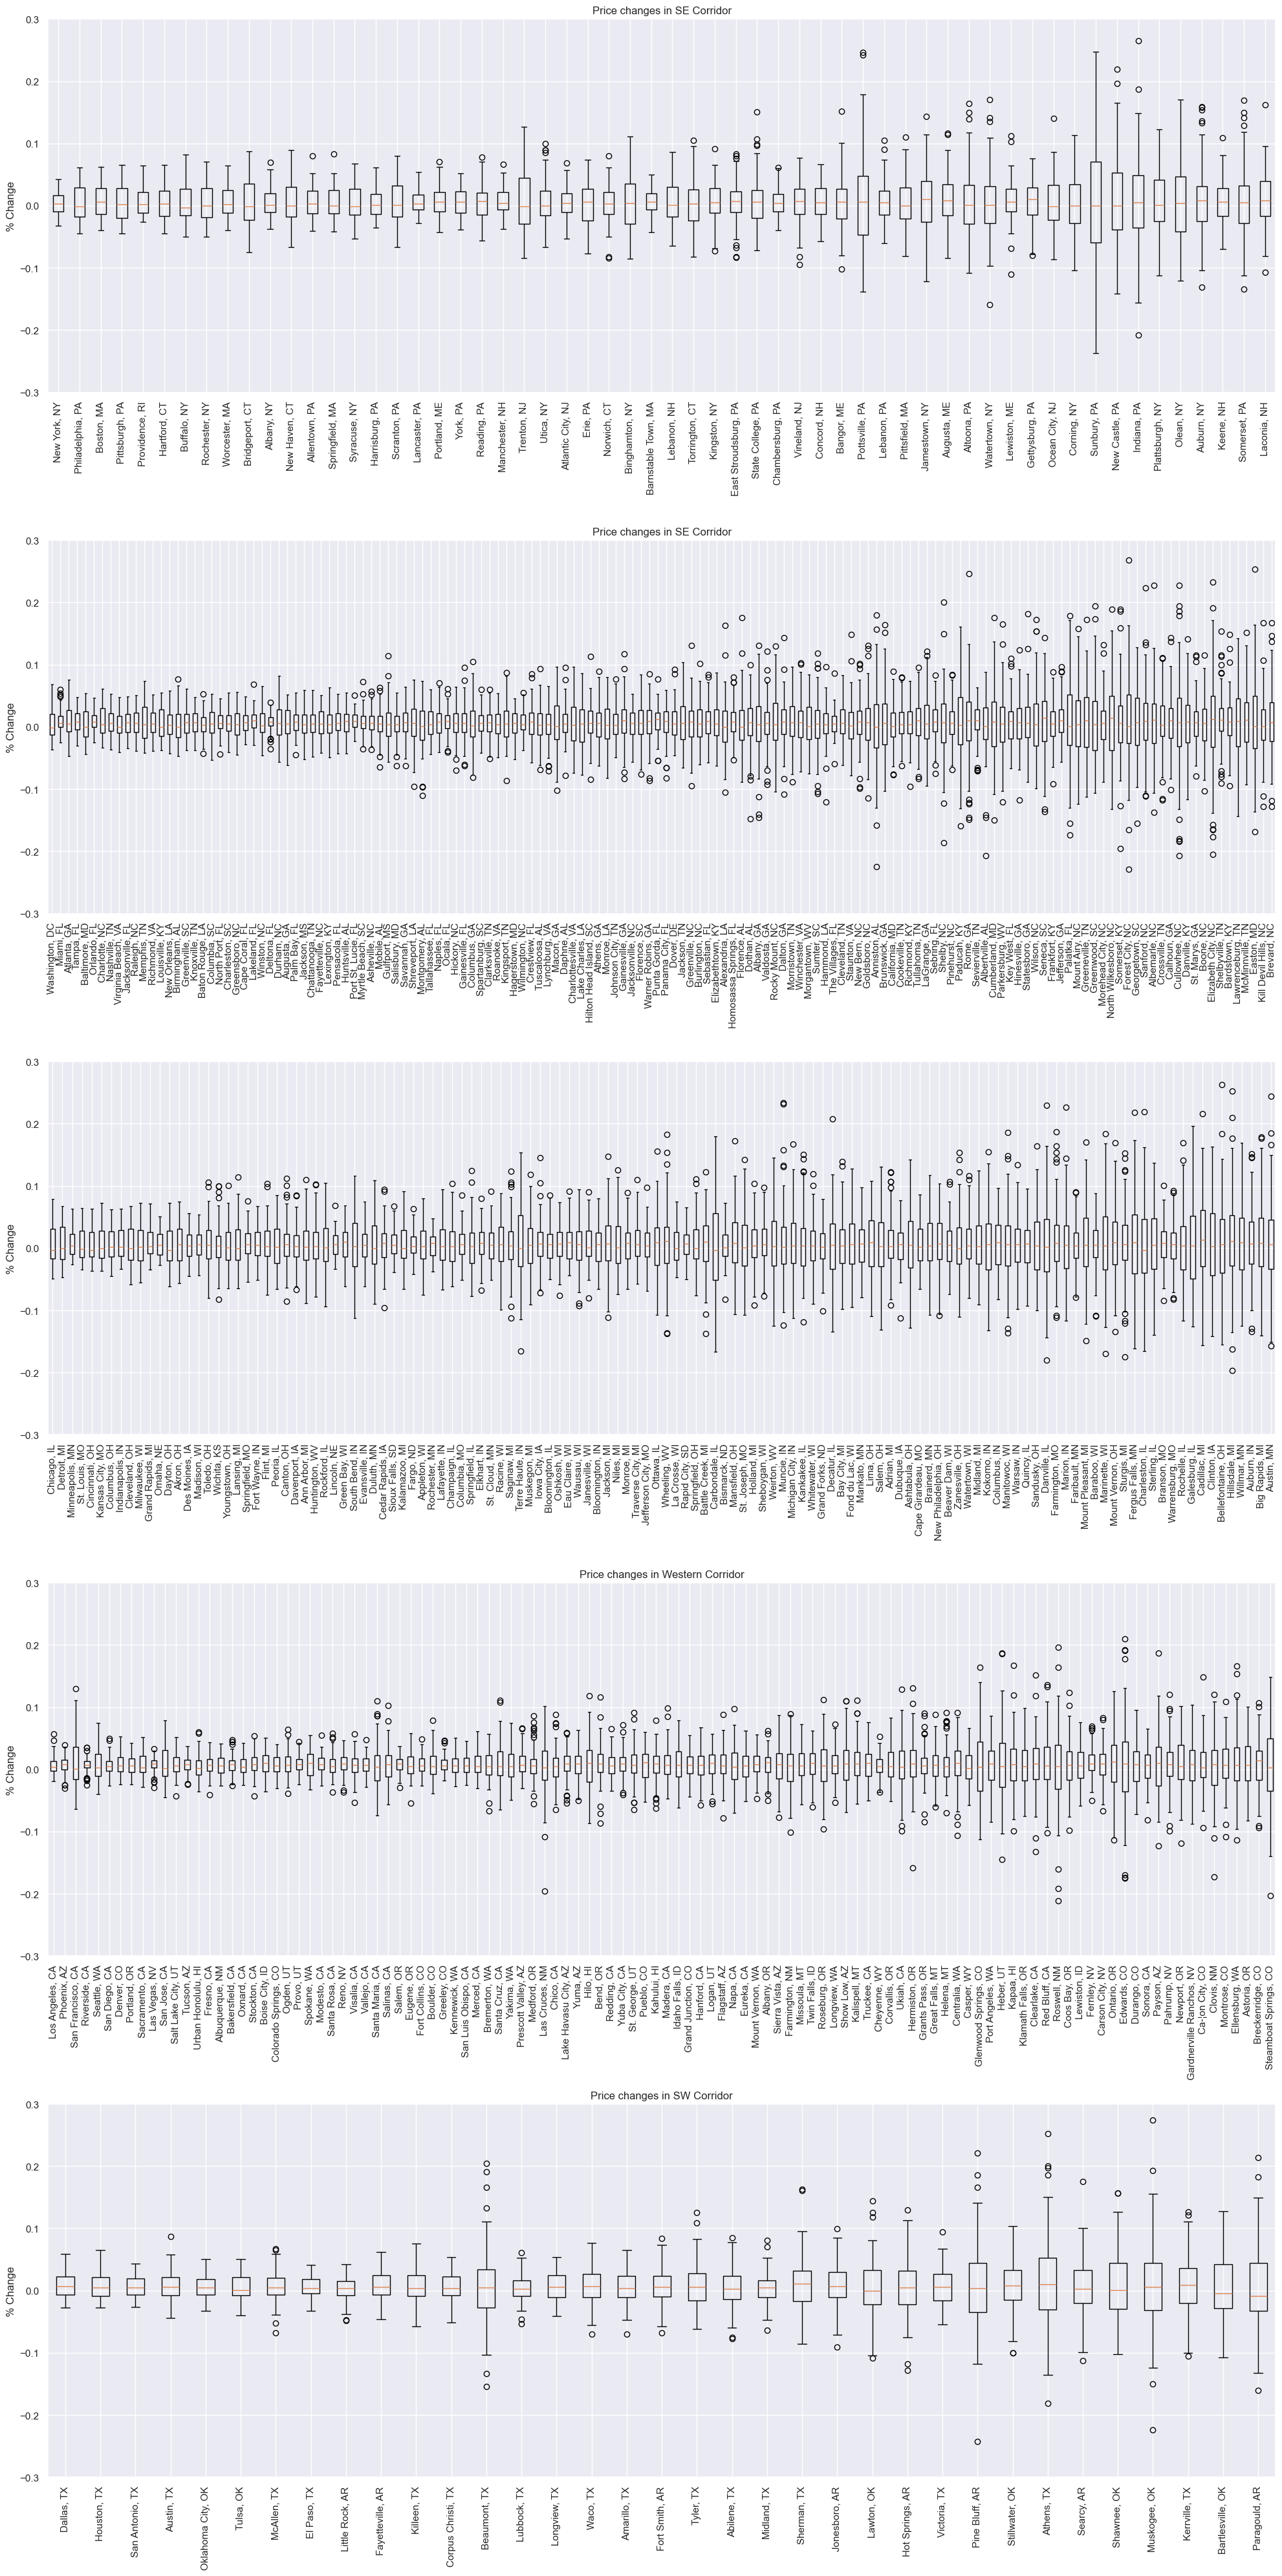

In [13]:
# Plotting NE sector
fig1, ax1 = plt.subplots(5,1, figsize=(20,40))
ax1[0].boxplot(df_ne_pct)
ax1[0].set_xticklabels(df_ne_pct.columns, rotation=90)
ax1[0].set_ylim(-0.3, 0.3)
ax1[0].set_ylabel("% Change")
ax1[0].set_title("Price changes in SE Corridor")
ax1[1].boxplot(df_se_pct)
ax1[1].set_xticklabels(df_se_pct.columns, rotation=90)
ax1[1].set_ylim(-0.3, 0.3)
ax1[1].set_ylabel("% Change")
ax1[1].set_title("Price changes in SE Corridor")
ax1[2].boxplot(df_mw_pct)
ax1[2].set_xticklabels(df_mw_pct.columns, rotation=90)
ax1[2].set_ylim(-0.3, 0.3)
ax1[2].set_ylabel("% Change")
ax1[3].set_title("Price changes in MW Corridor")
ax1[3].boxplot(df_w_pct)
ax1[3].set_xticklabels(df_w_pct.columns, rotation=90)
ax1[3].set_ylim(-0.3, 0.3)
ax1[3].set_ylabel("% Change")
ax1[3].set_title("Price changes in Western Corridor")
ax1[4].boxplot(df_sw_pct)
ax1[4].set_xticklabels(df_sw_pct.columns, rotation=90)
ax1[4].set_ylim(-0.3, 0.3)
ax1[4].set_ylabel("% Change")
ax1[4].set_title("Price changes in SW Corridor")
plt.tight_layout()
plt.show()

In [14]:
df_ne_pct.head()

RegionName,"New York, NY","Philadelphia, PA","Boston, MA","Pittsburgh, PA","Providence, RI","Hartford, CT","Buffalo, NY","Rochester, NY","Worcester, MA","Bridgeport, CT",...,"Corning, NY","Sunbury, PA","New Castle, PA","Indiana, PA","Plattsburgh, NY","Olean, NY","Auburn, NY","Keene, NH","Somerset, PA","Laconia, NH"
2/28/2013,-0.016123,-0.030511,-0.023233,-0.002,-0.023047,-0.029588,-0.016172,-0.014514,-0.002225,-0.025901,...,-0.039799,-0.041162,-0.082333,0.017454,0.043286,-0.083876,-0.06618,-0.059762,0.066843,-0.06185
3/31/2013,-0.011787,-0.00853,-0.00973,0.018701,-0.012671,-0.034073,-0.012937,0.016988,0.025845,-0.031339,...,-0.019193,-0.110214,0.007006,-0.150631,-0.029726,-0.101093,-0.131203,0.009431,-0.107417,-0.028844
4/30/2013,-0.005466,0.019355,0.034936,0.033364,0.017703,0.022048,0.013881,0.021022,0.028671,0.048038,...,0.097087,-0.008439,-0.114269,-0.07024,0.00817,0.003977,0.158723,-0.005499,-0.095983,0.029911
5/31/2013,0.025435,0.053165,0.044304,0.041881,0.043476,0.055216,0.021904,0.030675,0.034206,0.075772,...,-0.026921,0.126526,0.149721,0.083286,-0.049092,0.014773,0.136476,0.109174,-0.098263,0.072093
6/30/2013,0.040936,0.056091,0.062627,0.034599,0.064,0.065416,0.047337,0.026452,0.0441,0.086958,...,0.066732,0.090492,0.05528,0.120293,0.029827,0.04721,0.008721,0.01893,0.11863,0.038231


In [15]:
# Convert to Numeric
df_ne_pct = custom.convert_to_numeric(df_ne_pct, 1)
df_se_pct = custom.convert_to_numeric(df_se_pct, 1)
df_mw_pct = custom.convert_to_numeric(df_mw_pct, 1)
df_w_pct = custom.convert_to_numeric(df_w_pct, 1)
df_sw_pct = custom.convert_to_numeric(df_sw_pct, 1)

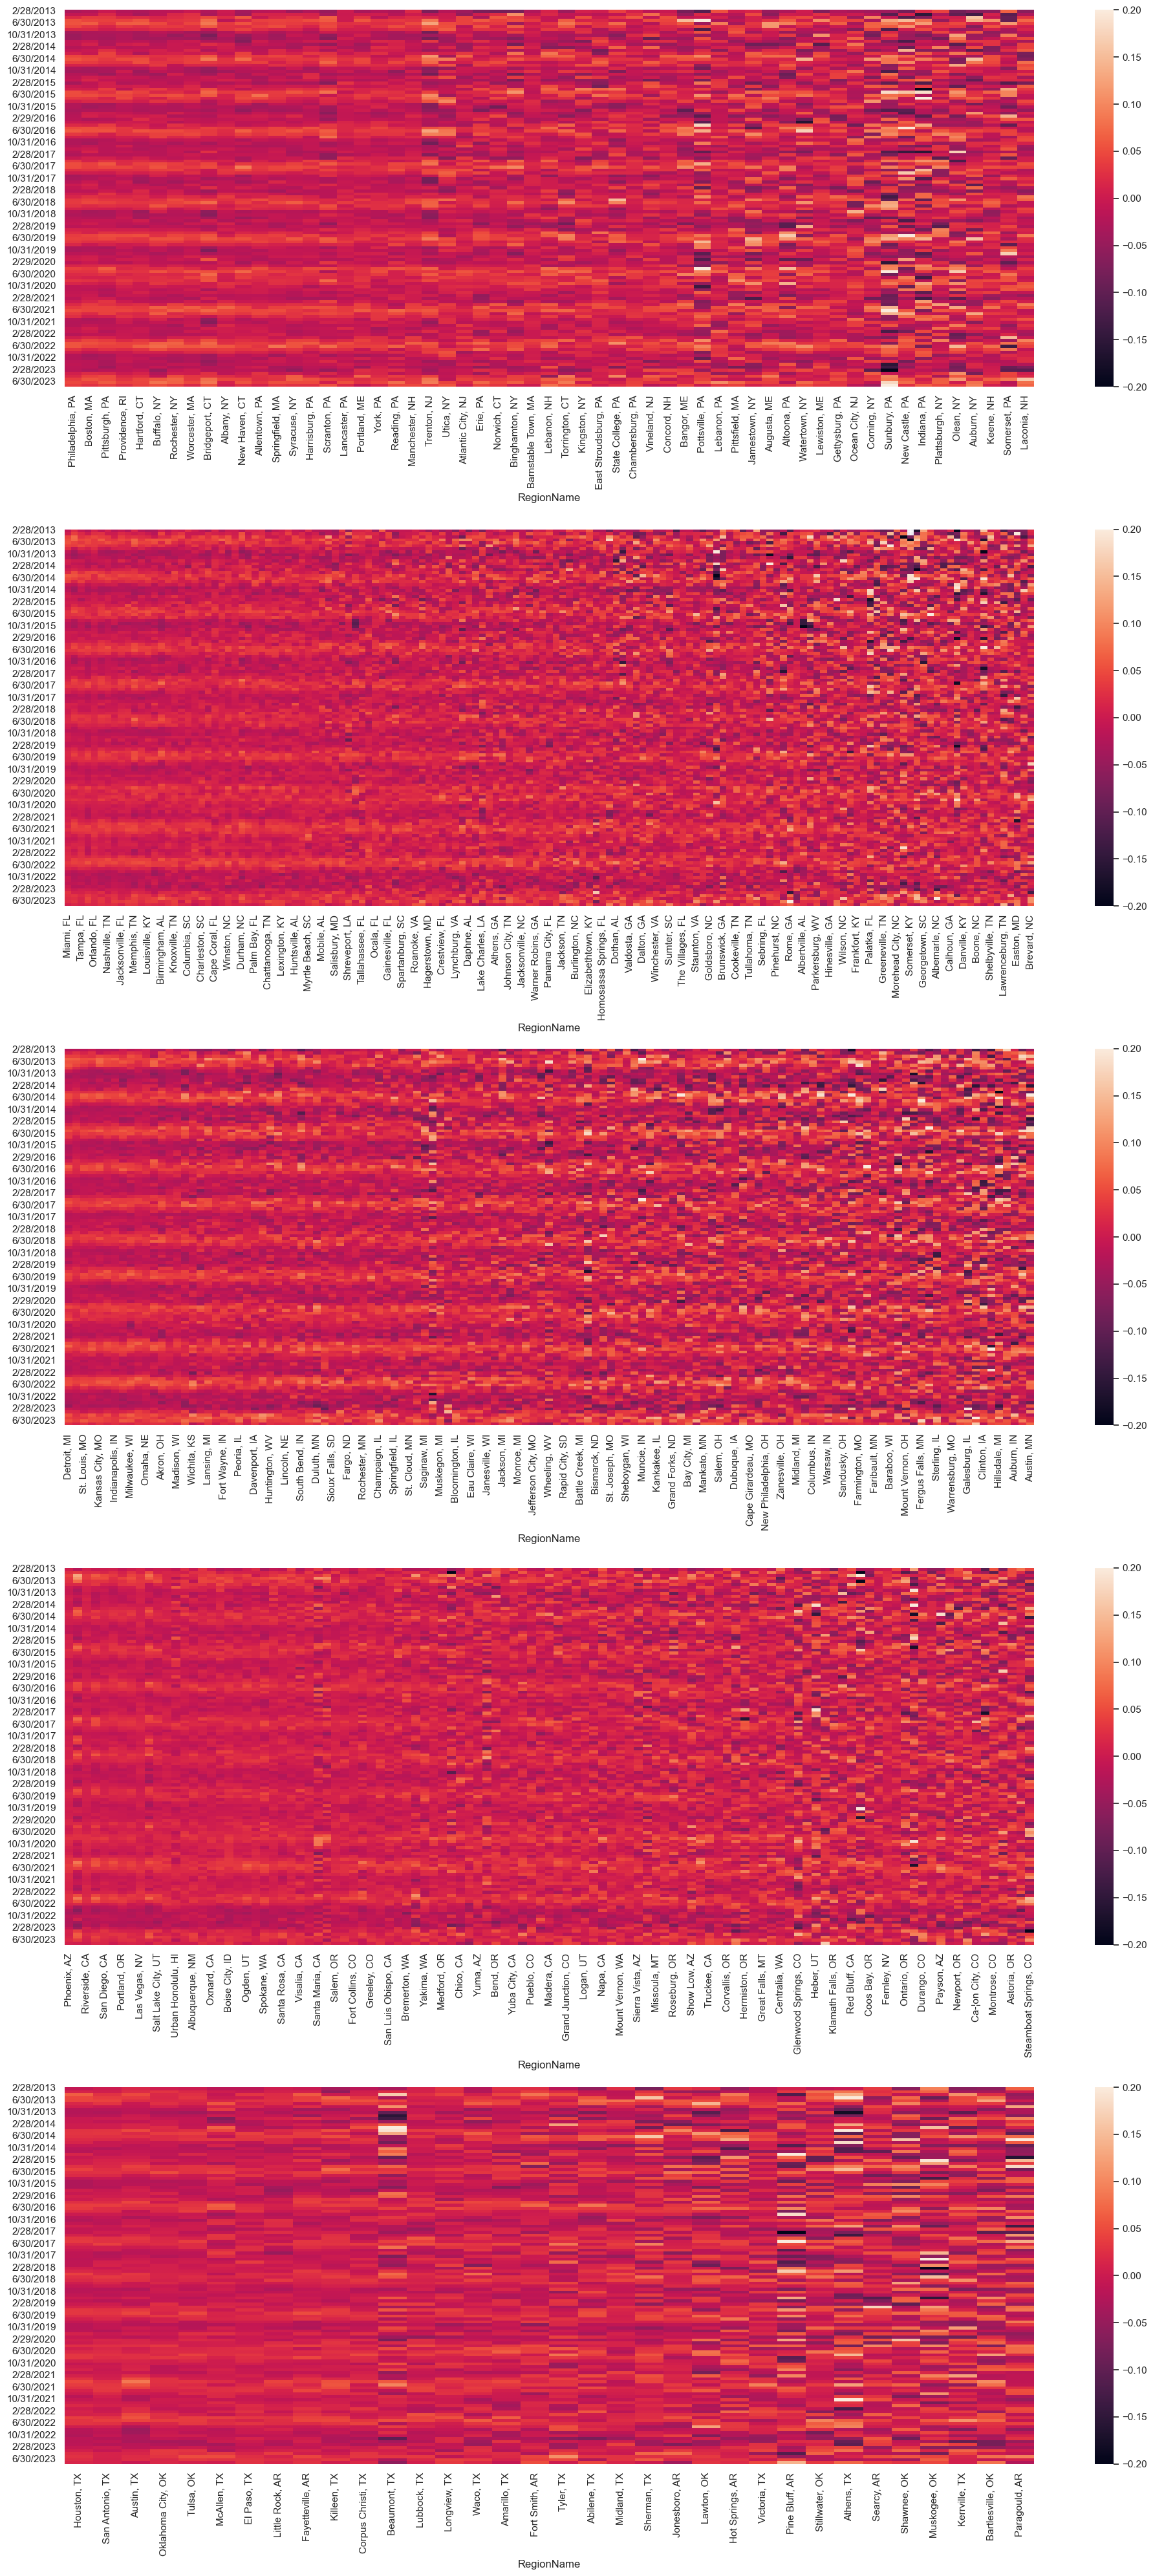

In [16]:
fig2, ax2 = plt.subplots(5,1, figsize=(20,40))
sns.heatmap(df_ne_pct.iloc[:, 1:], ax=ax2[0], vmin=-0.2, vmax=0.2)
sns.heatmap(df_se_pct.iloc[:, 1:], ax=ax2[1], vmin=-0.2, vmax=0.2)
sns.heatmap(df_mw_pct.iloc[:, 1:], ax=ax2[2], vmin=-0.2, vmax=0.2)
sns.heatmap(df_w_pct.iloc[:, 1:], ax=ax2[3], vmin=-0.2, vmax=0.2)
sns.heatmap(df_sw_pct.iloc[:, 1:], ax=ax2[4], vmin=-0.2, vmax=0.2)
plt.tight_layout()

In [23]:
# Generate table of variance by State:



{'Philadelphia, PA': 0.0007484436945189748,
 'Boston, MA': 0.0006766509580111607,
 'Pittsburgh, PA': 0.0007776098663181399,
 'Providence, RI': 0.00044620941430060655,
 'Hartford, CT': 0.0006804226048093983,
 'Buffalo, NY': 0.0008301774699810457,
 'Rochester, NY': 0.0007743356462013977,
 'Worcester, MA': 0.0005666472009344768,
 'Bridgeport, CT': 0.0015742438546987488,
 'Albany, NY': 0.0004184632074748893,
 'New Haven, CT': 0.0009519170291924926,
 'Allentown, PA': 0.0005489969030493534,
 'Springfield, MA': 0.0006256949836964212,
 'Syracuse, NY': 0.0007251397859860032,
 'Harrisburg, PA': 0.0005187869710989244,
 'Scranton, PA': 0.0012658817033991499,
 'Lancaster, PA': 0.00028233566592497097,
 'Portland, ME': 0.0004699058926213061,
 'York, PA': 0.00042031705626319595,
 'Reading, PA': 0.0006209300006779033,
 'Manchester, NH': 0.0004355748359488628,
 'Trenton, NJ': 0.0025075595584064824,
 'Utica, NY': 0.0011662751920875325,
 'Atlantic City, NJ': 0.0005892909130575815,
 'Erie, PA': 0.001127226